## 1. 必要なパッケージを読み込む

- Seurat: １細胞RNA-seqデータ解析の統合パッケージ
- tidyverse: テーブル形式のデータを解析するための統合パッケージ
    - モダンなデータサイエンスのための便利なパッケージ群


In [1]:
# Command-01

library(Seurat)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Attaching SeuratObject



In [2]:
# Command-02

library(tidyverse)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.5     ✔ dplyr   1.0.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 2. シードの固定

描画結果などがランダムになる部分の計算を、制御するためのおまじない。

In [3]:
# Command-03

set.seed(1234)

## 3. データ（遺伝子発現量行列）を読み込む

- このデータは、各行が遺伝子、各列が細胞を表してます
- つまり、
    - 行数＝遺伝子の数
    - 列数＝細胞の数
    - $i$ 行目、$j$ 列目の要素の数値は、$i$ 番目の遺伝子が $j$ 番目の細胞での発現量


In [4]:
# Command-04

# （ちょっと時間がかかります）

df_counts <- read_tsv("data/GSM3173562_Lakshmipuram_NCBI_processeddata.txt", col_names=TRUE)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  GENE = col_character()
)
ℹ Use `spec()` for the full column specifications.



## 4. 読み込んだデータの「形」を確認する

- 「形」と読んでいるのは、行数、列数、どんな値が入っているかなど

In [5]:
# Command-05

# 中身の確認 (最初の数行を出力する)

head(df_counts)

GENE,TAAGTTTGCAAT,CGCGACAGACTA,CCGATCCAGCCT,AATGGTATCCCT,TAAGTCACATCC,AACGACAACAGT,GCTCTTCTAAGA,ACGGCTTTTTAG,ACACCGGGCCGC,⋯,CTACTCAGAAAA,CAGTACGTAATA,GCTAAGCGATAA,ATGATAATGAAA,GACCATCGCCAA,TGAGTGCGCGGA,AGTTGCTCCCAA,AAATACGTATGG,CAAGGGTGCCGA,GGTGTGGATAGG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BPKG21685,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Bmi-1[1]_SmedASXL_000659,1,0,0,0,2,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CCD-like_smed016097,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
H.1.3b_spondin_SmedASXL_017661,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4_SmedASXL_005791,0,1,0,0,0,0,3,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4l_SmedASXL_014091,0,0,0,0,2,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
# Command-06

# 行数

nrow(df_counts)

[1] 51562

In [7]:
# Command-07

# 列数

ncol(df_counts)

[1] 2001

## 5. データを Seurat の形に変換する

In [8]:
# Command-08

# データフレームを行列に変換する
df_counts %>% 
select(-GENE) %>% 
as.matrix() ->
mat_counts

# 最初の数行を確認する

head(mat_counts)

TAAGTTTGCAAT,CGCGACAGACTA,CCGATCCAGCCT,AATGGTATCCCT,TAAGTCACATCC,AACGACAACAGT,GCTCTTCTAAGA,ACGGCTTTTTAG,ACACCGGGCCGC,CCCCGCTGGTGT,⋯,CTACTCAGAAAA,CAGTACGTAATA,GCTAAGCGATAA,ATGATAATGAAA,GACCATCGCCAA,TGAGTGCGCGGA,AGTTGCTCCCAA,AAATACGTATGG,CAAGGGTGCCGA,GGTGTGGATAGG
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,2,1,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
# Command-09

# データフレーム df_counts の GENE という列の値を、行列 mat_counts の行の名前として代入する

rownames(mat_counts) <- df_counts$GENE

# 最初の数行を確認する (Command-08 の時と比較して、行に名前がついた)

head(mat_counts)

,TAAGTTTGCAAT,CGCGACAGACTA,CCGATCCAGCCT,AATGGTATCCCT,TAAGTCACATCC,AACGACAACAGT,GCTCTTCTAAGA,ACGGCTTTTTAG,ACACCGGGCCGC,CCCCGCTGGTGT,⋯,CTACTCAGAAAA,CAGTACGTAATA,GCTAAGCGATAA,ATGATAATGAAA,GACCATCGCCAA,TGAGTGCGCGGA,AGTTGCTCCCAA,AAATACGTATGG,CAAGGGTGCCGA,GGTGTGGATAGG
BPKG21685,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Bmi-1[1]_SmedASXL_000659,1,0,0,0,2,2,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CCD-like_smed016097,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
H.1.3b_spondin_SmedASXL_017661,0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4_SmedASXL_005791,0,1,0,0,0,0,3,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LGR4l_SmedASXL_014091,0,0,0,0,2,1,0,1,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
# Command-10

# 作った行列の構造を確認する（出力の１行目は何行 x 何列か、３行目は行の名前 (row names)、4行目は列の名前 (column names) を表す）

str(mat_counts)

 num [1:51562, 1:2000] 0 1 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:51562] "BPKG21685" "Bmi-1[1]_SmedASXL_000659" "CCD-like_smed016097" "H.1.3b_spondin_SmedASXL_017661" ...
  ..$ : chr [1:2000] "TAAGTTTGCAAT" "CGCGACAGACTA" "CCGATCCAGCCT" "AATGGTATCCCT" ...


In [11]:
# Command-11

# Seurat オブジェクトに変換する 
# counts のところに先ほど作った mat_counts を設定
# project のところはなんでもいい（ここでは　"planarian_2k" を設定)

planarian <-  CreateSeuratObject(counts = mat_counts, project = "planarian_2k")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [12]:
# Command-12

# 作った Seurat オブジェクト (planarian) を確認する 
# (features は遺伝子、samples は細胞と読み替えてください)

planarian

An object of class Seurat 
51562 features across 2000 samples within 1 assay 
Active assay: RNA (51562 features, 0 variable features)

## 6: 品質の低い細胞をフィルターする

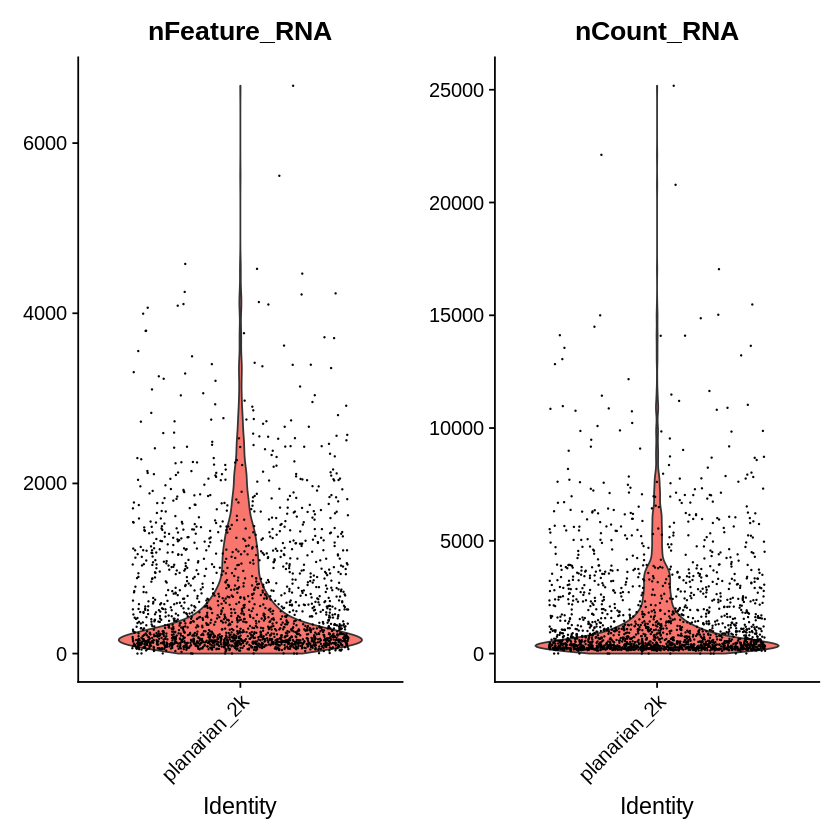

In [13]:
# Command-13

# Violin plot という種類のグラフ
# 各点は細胞を表す
# 横幅が大きい値のところに点（＝細胞）が多く集中している

# - nFeature_RNA は「その細胞で、何個の遺伝子の発現がみられたか」
# - nCount_RNA は「その細胞での、各遺伝子のカウントの合計値」
# 例：遺伝子が５つの生き物を想定する、５つの遺伝子のカウントがそれぞれ[10, 15, 0, 23, 594] だった時、
#      nFeature_RNA は4, nFeature_RNAは 642 (=10+15+23+594) となる

VlnPlot(planarian, features = c("nFeature_RNA", "nCount_RNA"), ncol = 2)

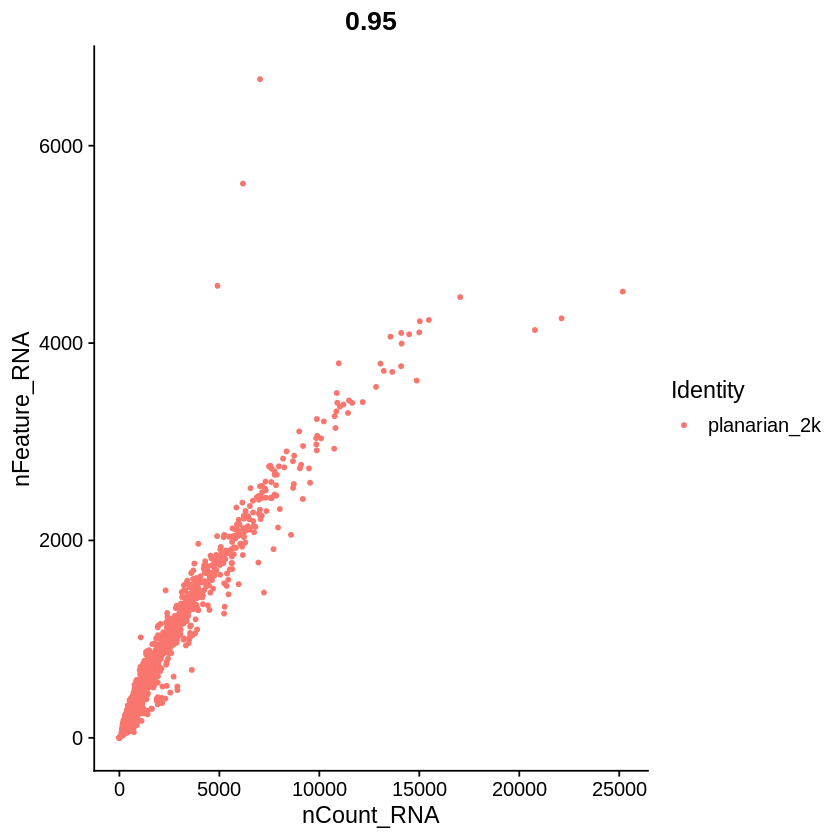

In [14]:
# Command-14

# 散布図
# 点は細胞を表す
# 横軸は nCount_RNA
# 縦軸は nFeature_RNA

FeatureScatter(planarian, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [15]:
# Command-15

# ここでは、RNAがあまり検出できていない細胞の情報を除きたい。
# そのために、RNAがある程度検出できている細胞を残すという操作をしている（混乱しないように）。

# `subset()` という関数は、特定の条件の細胞だけを選び取るために用いている。
# ここでは nFeature_RNA が200以上、かつ、nCount_RNA が 500 以上である細胞を選んでいる
# (`nFeature_RNA >= 200 & nCount_RNA >= 500` の部分で条件を指定している）


planarian <- subset(planarian, subset = nFeature_RNA >= 200 & nCount_RNA >= 500)

In [16]:
# Command-16

# Command-12 では 2000 samples だったが、 1131 samples になっている。
# つまり、RNAがある程度検出できている細胞を残した（RNAがあまり検出できていない細胞の情報を除いた）。

planarian

An object of class Seurat 
51562 features across 1131 samples within 1 assay 
Active assay: RNA (51562 features, 0 variable features)

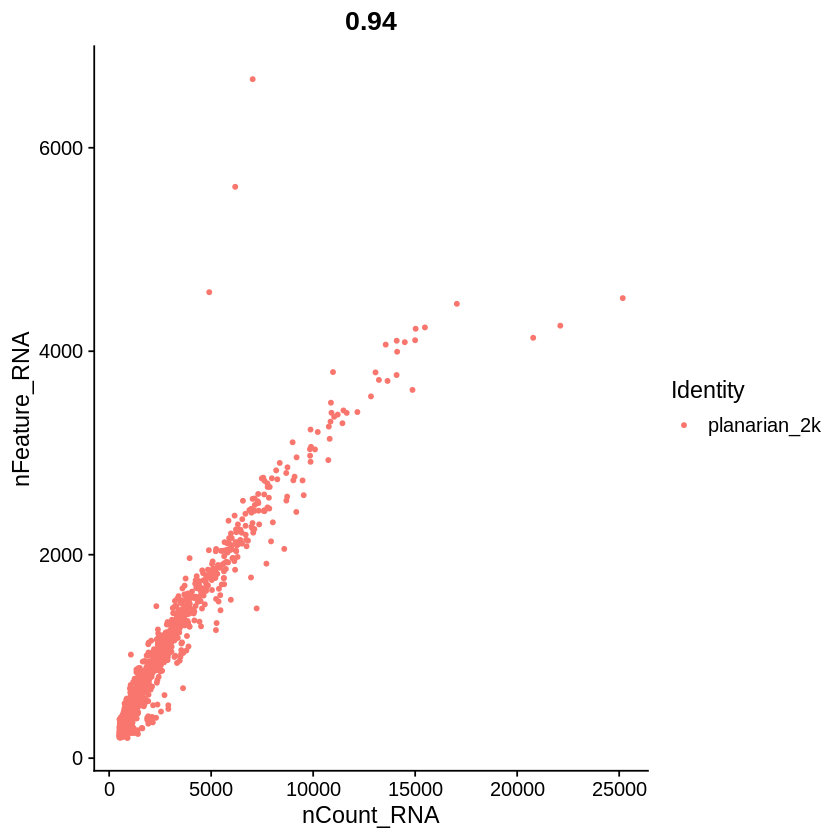

In [17]:
# Command-17

# Command-14 の時より0に近い細胞（点）がなくなっていることに注意

FeatureScatter(planarian, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

## 7. 発現量データを正規化する

- 細胞間で遺伝子発現量を比較できるように、正規化（Nomalization）を行う。
- ここでは、 `LogNormalize` という方法を使う
    - ある細胞 $j$ でのある遺伝子 $i$ の発現量を $x_{i,j}$  とする
    - scale.factor の値を $\alpha$ とする
    - まず、ある細胞 $j$ で feature (遺伝子) のカウントを合計する（この合計値を $S_j = \sum_i x_{i,j}$ とする)
    - 次に、ある細胞 $j$ での遺伝子のカウント $x_{i,j}$  を $S_j$ で割って $\alpha$ をかける ($\frac{x_{i,j}}{S_j}  \alpha $ )
    - さらに、1を足して、 logをとる ($y_{i,j} = \log(\frac{x_{i,j}}{S_j}  \alpha + 1)$)
    - この $y_{i,j}$ が正規化された発現量



In [18]:
#  Command-18

# 遺伝子発現量を正規化している

planarian <- NormalizeData(planarian, normalization.method = "LogNormalize", scale.factor = 10000)

## 8. 高変動遺伝子（highly variabe genes) を抽出する

- 高変動遺伝子（highly variabe genes; HVG) は、細胞間で発現量の変動が大きい遺伝子のこと
- １細胞RNA-seqのデータは遺伝子が数万 (今のデータだと 51562 features) ある「高次元データ」です
- 高次元データで全ての変数（＝ここでは遺伝子）の値を用いて解析すると、計算時間がかかったり、ノイズの影響を受けたりする
- そこで、「遺伝子発現量が、ランダムなノイズによる変動よりも大きな細胞間変動を示している遺伝子」を抽出することで、細胞間での生物学的な変動を反映した遺伝子だけにしてデータ解析をしたい
- そのために、ここでは、どれが高変動遺伝子かを見つけます

In [19]:
# Command-19

# どれが高変動遺伝子かを見つけます
# 変動が大きな 2000個の遺伝子を探す (nfeatures でってい)

planarian <- FindVariableFeatures(planarian, selection.method = "vst", nfeatures = 2000)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.083”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.33061”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”


In [20]:
# Command-20

# トップ10の高変動遺伝子を抽出する

top10 <- head(VariableFeatures(planarian), 10)

print(top10)

 [1] "SmedASXL-009682"              "SmedASXL-003140"             
 [3] "SmedASXL-049765"              "SmedASXL-013906"             
 [5] "Smed-prog-1h-SmedASXL-009962" "Smed-prog-1i-SmedASXL-013905"
 [7] "SmedASXL-014295"              "SmedASXL-009683"             
 [9] "SmedASXL-012836"              "SmedASXL-008237"             


Warning message:
“Transformation introduced infinite values in continuous x-axis”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


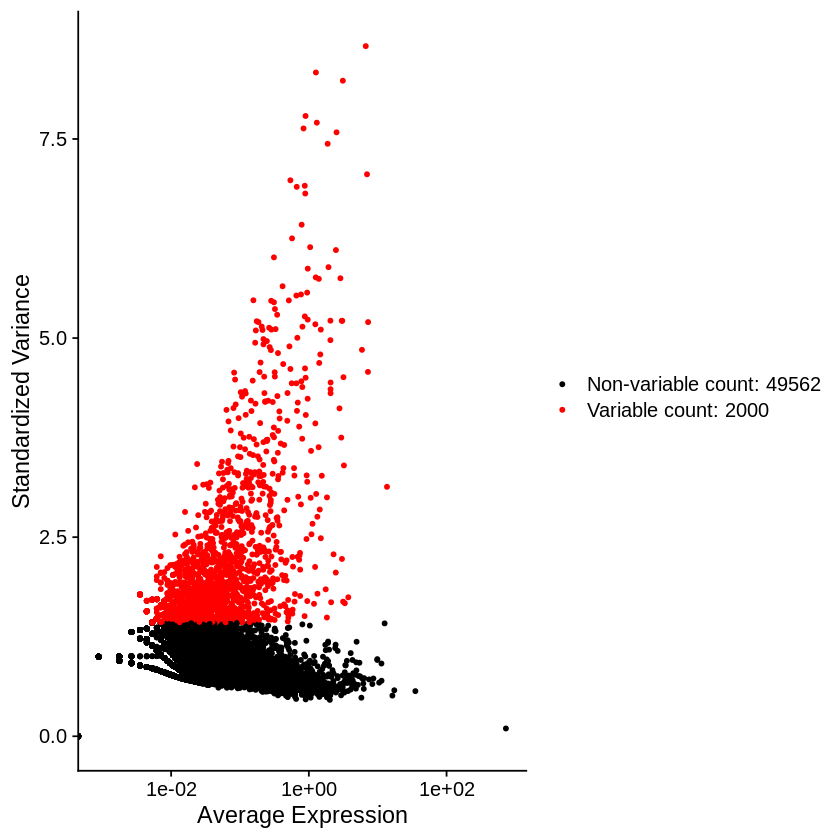

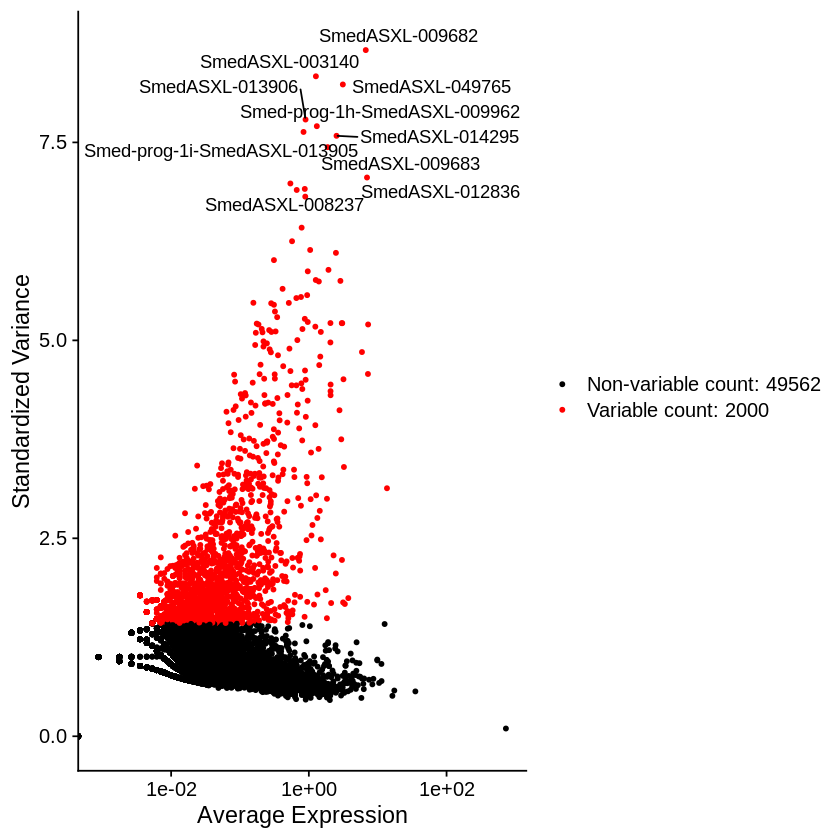

In [21]:
# Command-21

# 高変動遺伝子の
# 点は遺伝子を表す
# 横軸は、遺伝子発現量を細胞間で平均をとった値
# 縦軸は、遺伝子発現量の細胞間での分散（を標準化したもの）

# 上にある点（＝遺伝子）は変動が大きい。→高変動遺伝子と考える
# 高変動遺伝子と判定された遺伝子は赤くなっている

plot1 <- VariableFeaturePlot(planarian)
plot1

# 同じグラフで、変動が大きい遺伝子について、遺伝子名を表示している

LabelPoints(plot = plot1, points = top10, repel = TRUE)

## 9. データをスケーリングする

- このあと行う主成分分析などでは、各遺伝子の発現量のスケールが揃っていていることが想定されている
- しかし、現状では、低発現の遺伝子と高発現の遺伝子では、発現量に1000~10000倍の差がある
- そこで、遺伝子間でのスケールを揃えるために、スケーリングを行う
- 具体的には
    - 遺伝子ごとに、合計が０になるようにし（センタリング; centering) 、その上で、分散が1になるようにする
- スケーリングの、細胞 $i$, 遺伝子 $j$ の発現量は $y^\prime_{i,j}$ と考えられる


In [22]:
# Command-22

#  スケーリングの対象の遺伝子を選ぶ (全遺伝子を使う)

all.genes <- rownames(planarian)

# `all.genes` の要素数（スケーリングの対象の遺伝子の数）を念のため確認
print(length(all.genes))

# 遺伝子発現量をスケーリングする
# (少し時間がかかります)

planarian <- ScaleData(planarian, features = all.genes)

[1] 51562


Centering and scaling data matrix



## 10. PCA（主成分分析）を用いて次元削減を行う

- 主成分分析
    - Principal component analysis (PCA) 
- PCAでは、主成分（PC (Principal component) ） $p$ ごとかつ細胞 $j$　ごとに主成分スコア $z_{j,p}$ が計算される
    - 例えば、 5番目の細胞の PC1 の主成分スコアは $z_{5,1}$
- 主成分スコア $z_{j,p}$　と各遺伝子 $i$ の発現量 $y^\prime_{i,j}$ の関連の強さを表す値を、因子負荷量 (factor loading) と呼ぶ。
    - 各主成分 $p$ と各遺伝子 $i$ の組み合わせについて、 因子負荷量 $w_{p,i}$ が計算できる
    - $w_{p,i}$ が正で絶対値が高い遺伝子は、主成分スコア $z_{j,p}$ が高い細胞で  $y^\prime_{i,j}$ の発現量が高いという関係がある
    - $w_{p,i}$ が負で絶対値が高い遺伝子は、主成分スコア $z_{j,p}$ が高い細胞で  $y^\prime_{i,j}$ の発現量が低いという関係がある


In [23]:
# Command-23

# 遺伝子発現量行列に対してPCAを行う
# (PC_1, PC_2, などと表示されるはず)

planarian <- RunPCA(planarian, features = VariableFeatures(object = planarian))

PC_ 1 
Positive:  SmedASXL-010882, SmedASXL-018040, SmedASXL-039160, SmedASXL-002399, SmedASXL-004429, SmedASXL-004691, SmedASXL-072126, Smed-prog-1h-SmedASXL-009962, SmedASXL-043921, SmedASXL-066574 
	   SmedASXL-012205, SmedASXL-071929, Smed-prog1g-SmedASXL-003595, SmedASXL-002991, SmedASXL-059323, SmedASXL-011559, SmedASXL-002064, SmedASXL-002169, SmedASXL-041705, SmedASXL-000915 
	   SmedASXL-002794, SmedASXL-003039, SmedASXL-077631, SmedASXL-019259, SmedASXL-009939, SmedASXL-004080, Smed-prog-1e-SmedASXL-004473, SmedASXL-005341, SmedASXL-004067, SmedASXL-006858 
Negative:  SmedASXL-007995, SmedASXL-017153, SmedASXL-018827, SmedASXL-007801, SmedASXL-016498, SmedASXL-016756, SmedASXL-017925, SmedASXL-018822, SmedASXL-006925, SmedASXL-006640 
	   SmedASXL-016763, SmedASXL-003474, SmedASXL-017924, SmedASXL-003960, SmedASXL-006602, SmedASXL-004205, SmedASXL-013316, SmedASXL-018727, SmedASXL-006502, SmedASXL-009504 
	   SmedASXL-018990, SmedASXL-004168, SmedASXL-016622, SmedASXL-018692,

In [24]:
# Command-24

# 主成分（PC (Principal component) ）ごとに、その主成分スコアと遺伝子発現量の相関が高い（正負それぞれ）遺伝子5つを表示させる

print(planarian[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  SmedASXL-010882, SmedASXL-018040, SmedASXL-039160, SmedASXL-002399, SmedASXL-004429 
Negative:  SmedASXL-007995, SmedASXL-017153, SmedASXL-018827, SmedASXL-007801, SmedASXL-016498 
PC_ 2 
Positive:  SmedASXL-012760, SmedASXL-004168, SmedASXL-006925, SmedASXL-018692, SmedASXL-018822 
Negative:  SmedASXL-061273, SmedASXL-025551, SmedASXL-008144, SmedASXL-004179, SmedASXL-006564 
PC_ 3 
Positive:  SmedASXL-061273, SmedASXL-018633, SmedASXL-008144, SmedASXL-025551, SmedASXL-006649 
Negative:  SmedASXL-008653, SmedASXL-006346, SmedASXL-025702, SmedASXL-017551, Smed-prog-1-NB.21.11e-SmedASXL-011484 
PC_ 4 
Positive:  SmedASXL-018149, SmedASXL-025551, SmedASXL-006649, SmedASXL-072646, SmedASXL-008144 
Negative:  SmedASXL-018694, SmedASXL-017190, SmedASXL-049765, SmedASXL-018220, SmedASXL-009754 
PC_ 5 
Positive:  SmedASXL-049765, SmedASXL-018694, SmedASXL-010496, SmedASXL-003877, SmedASXL-009503 
Negative:  SmedASXL-017403, SmedASXL-011362, SmedASXL-009012, SmedASXL-008913, 

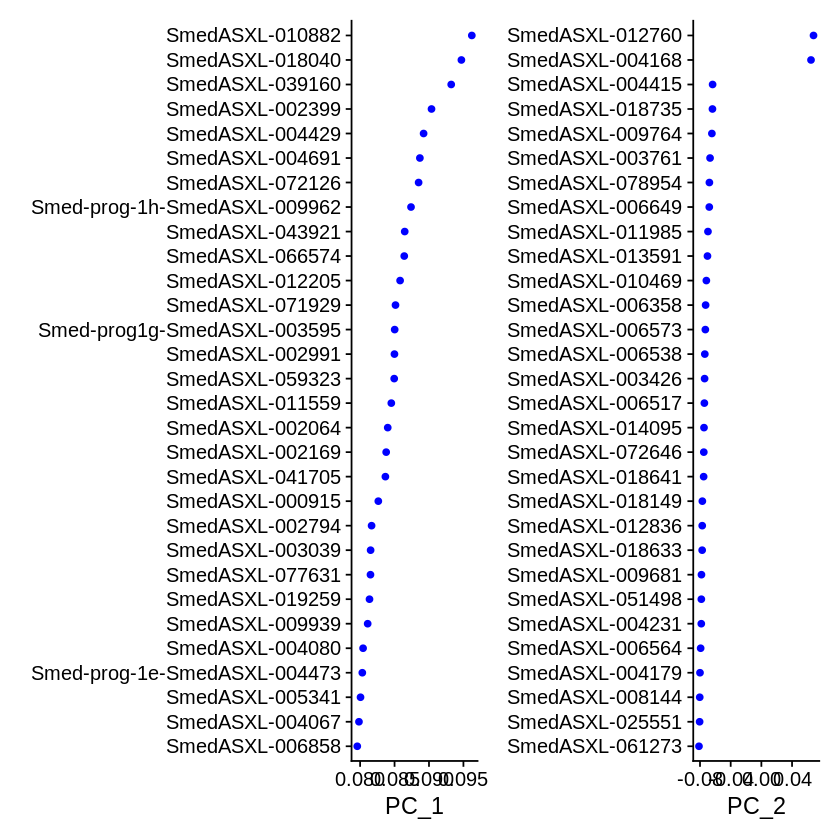

In [25]:
# Command-25

# 主成分（PC (Principal component) ）ごとに、その主成分スコアと遺伝子発現量の相関が高い（正負それぞれ）遺伝子を表示させる

VizDimLoadings(planarian, dims = 1:2, reduction = "pca")

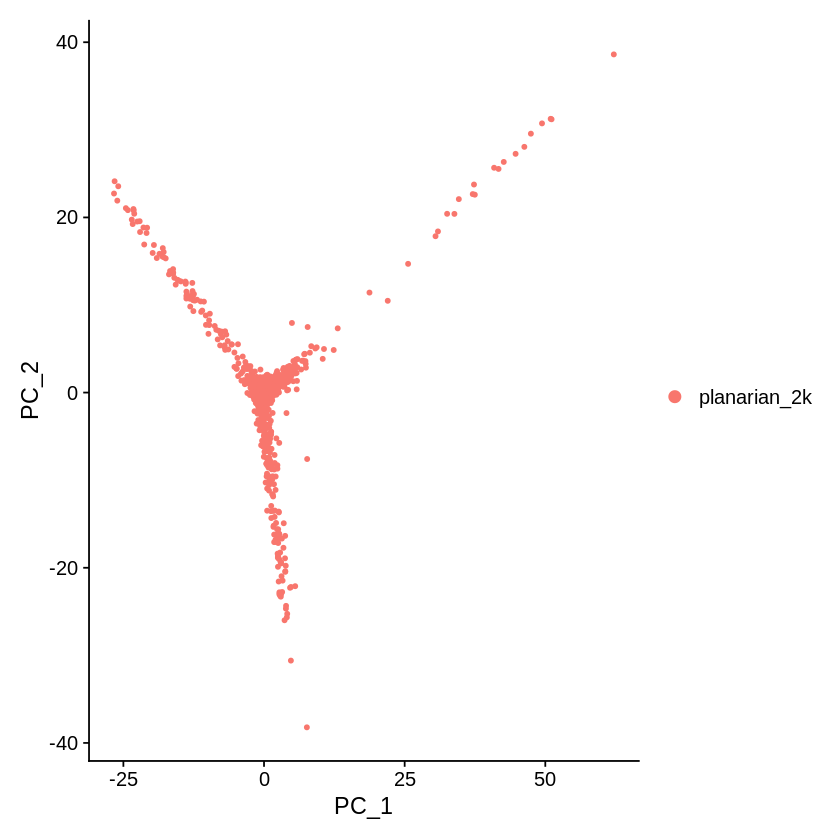

In [26]:
# Command-26

# 散布図を表示する
# 点は細胞
# PCAの結果から、各細胞 $j$ の PC1の主成分スコア $z_{j,1}$ （横軸）とPC2 の主成分スコア $z_{j,2}$ （縦軸）を表示している

DimPlot(planarian, reduction = "pca")

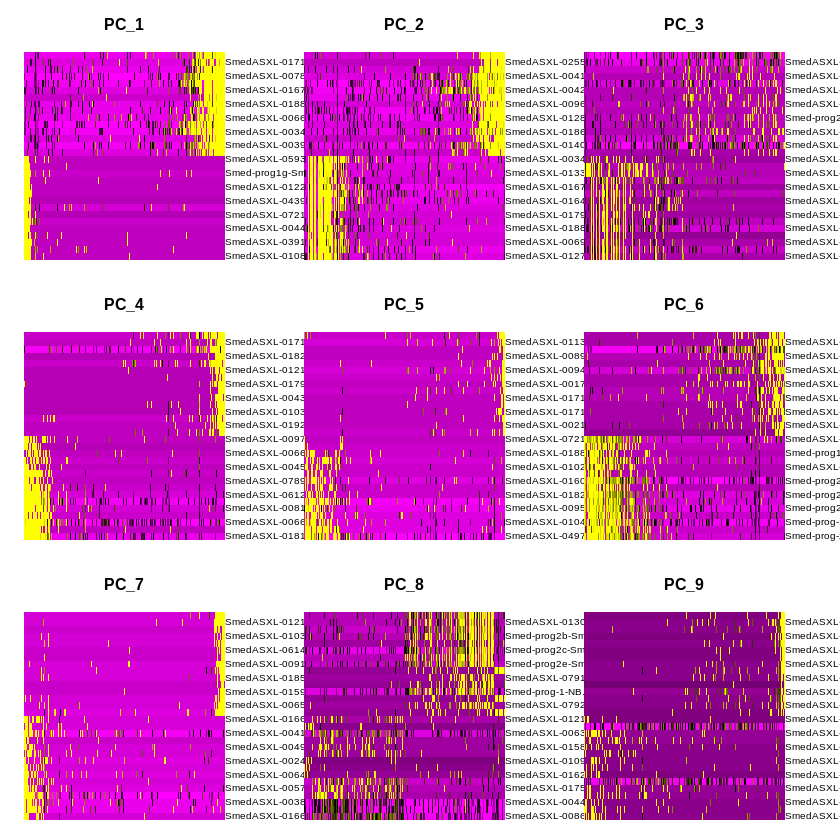

In [27]:
# Command-27

# 主成分ごとにヒートマップを表示
# ヒートマップの横軸は細胞を表す。細胞は主成分スコアの順に並んでいる
# ヒートマップの縦軸は遺伝子。因子負荷量の絶対値が大きい遺伝子だけが表示されている
# 発現量に応じて各要素の色が異なる

DimHeatmap(planarian, dims = 1:9, cells = 500, balanced = TRUE)

## 11. 何番目の主成分までを考慮すべきかを調べる

- PCAでは、PC1, PC2, ...　の順に（元のデータが持つ変動の再構成に）重要となる
- 番号が後ろの主成分ほど、寄与が小さい（→無視できる）
- 何番目の主成分までを考慮すべきかを調べる


In [28]:
# Command-28

# 準備

# 少し時間がかかります
planarian <- JackStraw(planarian, num.replicate = 100)
planarian <- ScoreJackStraw(planarian, dims = 1:20)

Warning message:
“Removed 21913 rows containing missing values (geom_point).”


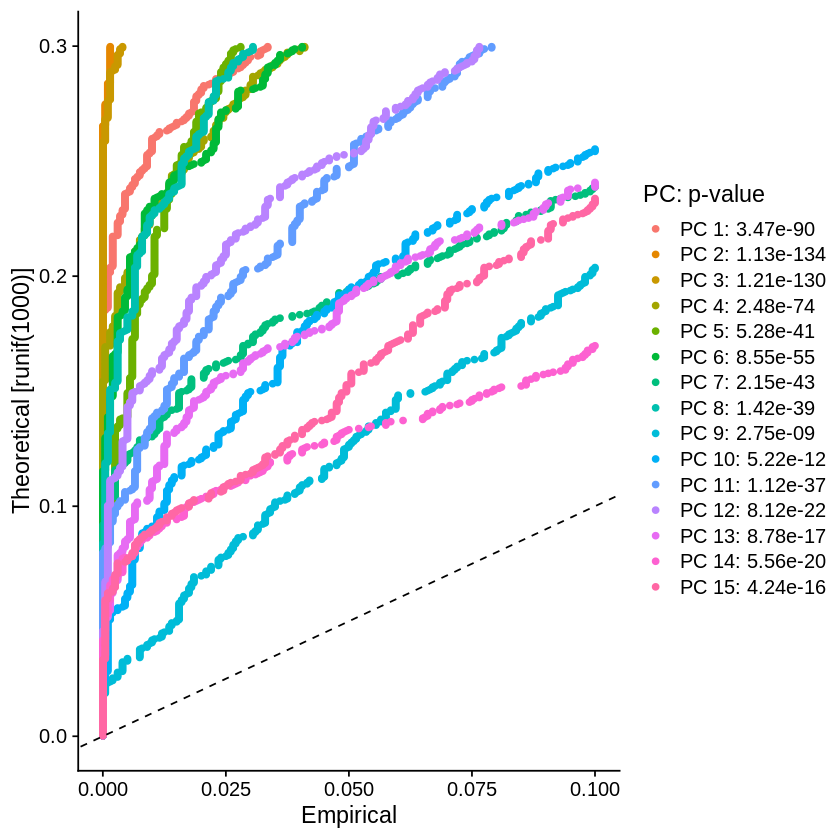

In [29]:
# Command-29

# - 点線に近いほど重要でない

JackStrawPlot(planarian, dims = 1:15)

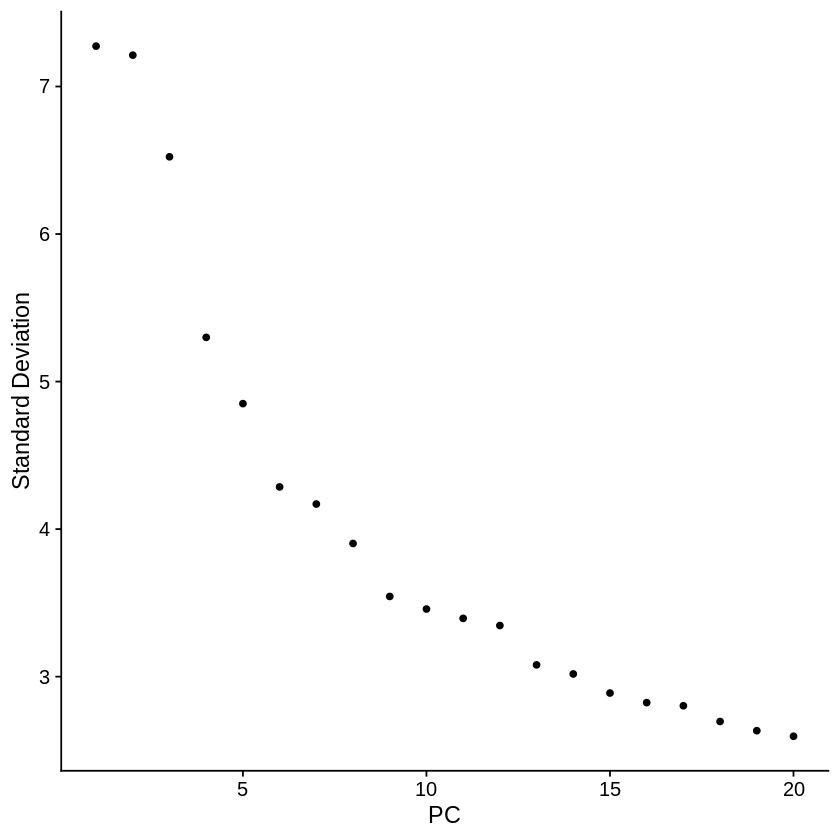

In [30]:
# Command-30

# - 縦軸の値が小さいほど重要でない

ElbowPlot(planarian)

## 12. 細胞をクラスタリングする


- クラスタリングとは、たくさんのサンプルを、データの値の類似性に基づいて、いくつかのグループに分けることでさる
- １細胞RNA-seqの場合は、たくさんの細胞を、遺伝子発現量の類似性に基づいて、いくつかのグループに分けることである
- クラスタリングにより見つかったグループをクラスターと呼ぶ

In [31]:
# Command-31

# クラスタリングの準備のために、各細胞について、似ている（＝類似度が大きい、近い）細胞を計算しておく

planarian <- FindNeighbors(planarian, dims = 1:10)

# クラスタリングを行う
# (Number of communities:  のところの数値が、見つかったクラスターの数)

planarian <- FindClusters(planarian, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1131
Number of edges: 31593

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8590
Number of communities: 10
Elapsed time: 0 seconds


In [32]:
# Command-32

# クラスタリングの結果（各細胞がどのクラスター（番号で表される）に割り当てられたか）を調べる
# 最初の１０細胞についてのみ表示

head(Idents(planarian), 10)

head(planarian$seurat_clusters, 10)

TAAGTTTGCAAT CGCGACAGACTA CCGATCCAGCCT AATGGTATCCCT TAAGTCACATCC AACGACAACAGT 
           5            4            0            8            4            0 
GCTCTTCTAAGA ACGGCTTTTTAG ACACCGGGCCGC CCCCGCTGGTGT 
           0            0            0            0 
Levels: 0 1 2 3 4 5 6 7 8 9

TAAGTTTGCAAT CGCGACAGACTA CCGATCCAGCCT AATGGTATCCCT TAAGTCACATCC AACGACAACAGT 
           5            4            0            8            4            0 
GCTCTTCTAAGA ACGGCTTTTTAG ACACCGGGCCGC CCCCGCTGGTGT 
           0            0            0            0 
Levels: 0 1 2 3 4 5 6 7 8 9

In [33]:
# Command-33

#  各クラスターに割り当てられた細胞の数 (n_cell の列)を集計

as_tibble(Idents(planarian), rownames = "cell_barcode") %>% 
    rename(cluster=value) %>%
    group_by(cluster) %>%
    summarise(n_cell = n())

,cluster,n_cell
,<fct>,<int>
1,0,446
2,1,164
3,2,115
4,3,107
5,4,83
6,5,77
7,6,74
8,7,27
9,8,20


## B13: PCAの結果にさらにUMAPをかけて２次元空間に射影する

In [34]:
# Command-34

# UMAPの計算を行う

planarian <- RunUMAP(planarian, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
08:18:41 UMAP embedding parameters a = 0.9922 b = 1.112

08:18:41 Read 1131 rows and found 10 numeric columns

08:18:41 Using Annoy for neighbor search, n_neighbors = 30

08:18:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

08:18:42 Writing NN index file to temp file /tmp/RtmpKVasp4/file1b371164972

08:18:42 Searching Annoy index using 1 thread, search_k = 3000

08:18:42 Annoy recall = 100%

08:18:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

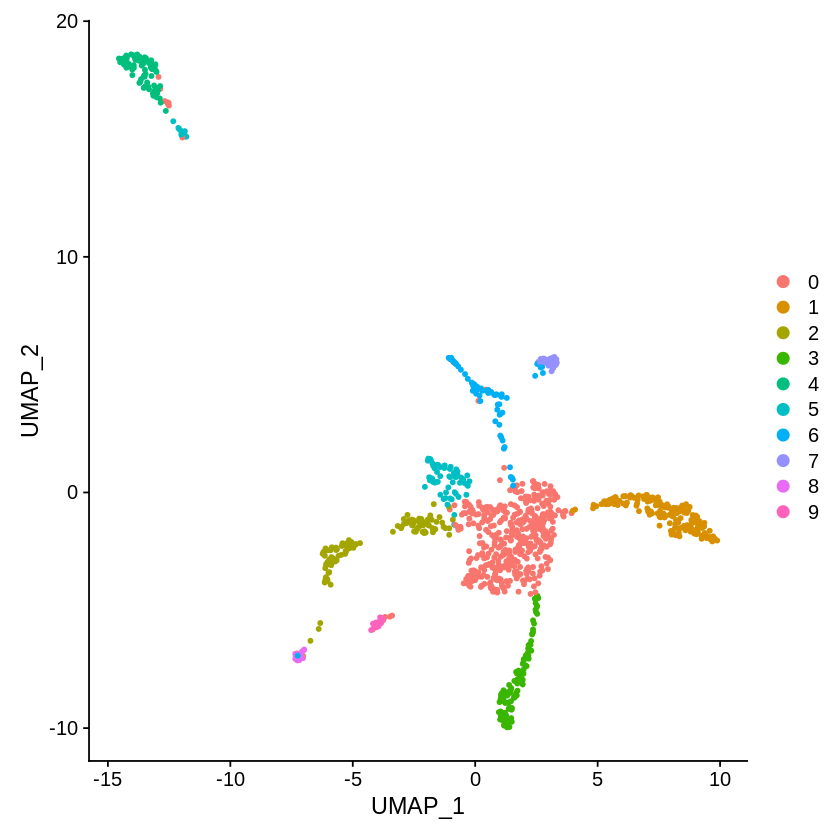

In [35]:
# Command-35

# UMAP の計算結果を表示する
# 点が細胞
# 点の色はクラスターを表す

DimPlot(planarian, reduction = "umap")


## 14. 各クラスターに特徴的な遺伝子群を探す

In [36]:
# Command-36

# クラスター 1 についてのマーカー遺伝子を探す

cluster1_markers <- FindMarkers(planarian, ident.1 = 1, min.pct = 0.25)

# マーカー遺伝子５つをとりあえず表示

head(cluster1_markers, n = 5)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SmedASXL-019713,1.280280e-140,3.614379,0.872,0.080,6.601381e-136
Smed-prog-2a-SmedASXL-014068-BPKG56961,3.318485e-121,4.599959,0.915,0.150,1.711077e-116
Smed-prog2b-SmedASXL-008106,5.208112e-120,3.581698,0.884,0.132,2.685407e-115
SmedASXL-079104,1.419438e-112,2.529546,0.610,0.025,7.318909e-108
Smed-prog2d-SmedASXL-010536,5.211865e-109,3.891065,0.939,0.219,2.687342e-104


In [37]:
# Command-37

# クラスター5を クラスター0および3と分けるようなマーカー遺伝子を探す

cluster5_markers <- FindMarkers(planarian, ident.1 = 5, ident.2 = c(0, 3), min.pct = 0.25)
head(cluster5_markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SmedASXL-061405,5.292551e-25,3.622639,0.727,0.266,2.728945e-20
SmedASXL-010722,2.945356e-23,2.317702,0.312,0.027,1.518684e-18
SmedASXL-006919,2.303004e-21,-1.772491,0.844,0.949,1.187475e-16
SmedASXL-019170,6.234960e-21,1.697938,0.260,0.018,3.214870e-16
SmedASXL-078973,6.076388e-18,1.699254,0.377,0.065,3.133107e-13


In [38]:
# Command-38

# 全てのクラスターについて、あるクラスター　＄c$ とその他のクラスターを分けるようなマーカー遺伝子を探す
# クラスター $c$ で発現量が高く、他のクラスターでは発現量が低いようなものだけにする (`only.pos = TRUE` )

planarian_markers <- FindAllMarkers(planarian, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [39]:
# Command-39

# 各クラスターについて、avg_log2FC の値のトップ2遺伝子を表示
# (各クラスターのマーカー遺伝子を見ようとしている)

planarian_markers %>% 
    group_by(cluster) %>% 
    top_n(n = 2, avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
7.136467e-77,2.238590,0.771,0.328,3.679705e-72,0,SmedASXL-008653
1.862486e-44,1.813897,0.619,0.289,9.603350e-40,0,SmedASXL-006346
3.318485e-121,4.599959,0.915,0.150,1.711077e-116,1,Smed-prog-2a-SmedASXL-014068-BPKG56961
4.262424e-86,5.143246,0.939,0.380,2.197791e-81,1,Smed-prog-1-NB.21.11e-SmedASXL-011484
2.023064e-37,3.260031,0.304,0.026,1.043132e-32,2,SmedASXL-012349
9.532840e-20,5.391326,0.313,0.068,4.915323e-15,2,SmedASXL-001927
3.105188e-86,5.374981,0.935,0.209,1.601097e-81,3,SmedASXL-007801
1.094534e-45,5.394559,0.776,0.253,5.643634e-41,3,SmedASXL-014295
5.770853e-56,6.332303,0.916,0.307,2.975567e-51,4,SmedASXL-018633


## 15. クラスターごとに遺伝子発現量をプロットする

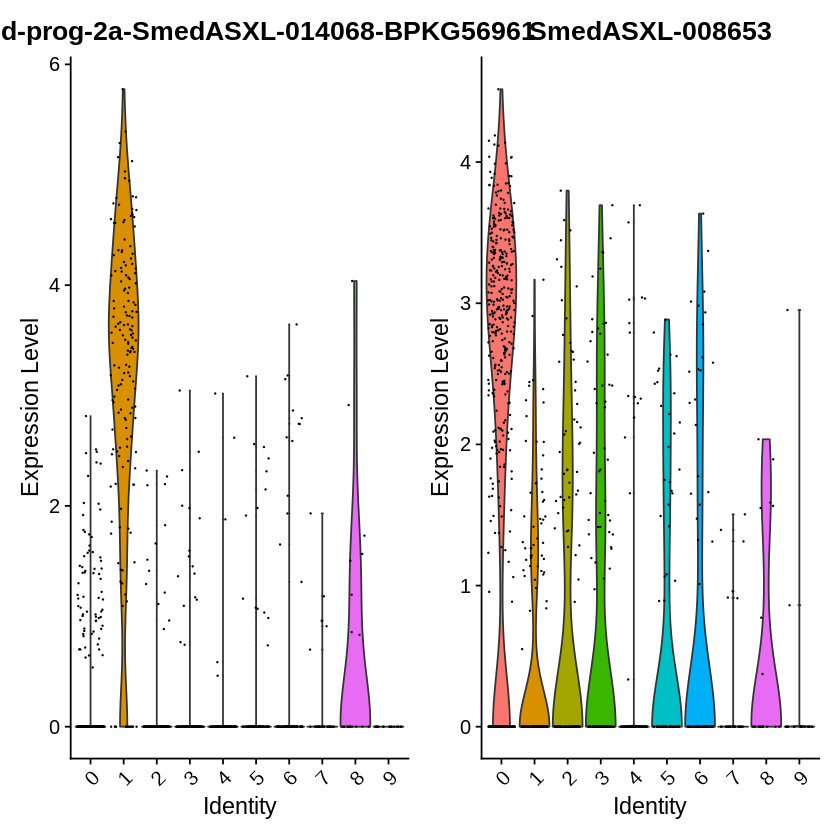

In [40]:
# Command-40

# Violin plot を表示
# 横軸はクラスターを表す
# 点は細胞
# 縦軸は遺伝子発現量を表す
# クラスター間で発現量の分布が異なることがわかる

VlnPlot(planarian, features = c("Smed-prog-2a-SmedASXL-014068-BPKG56961", "SmedASXL-008653"))

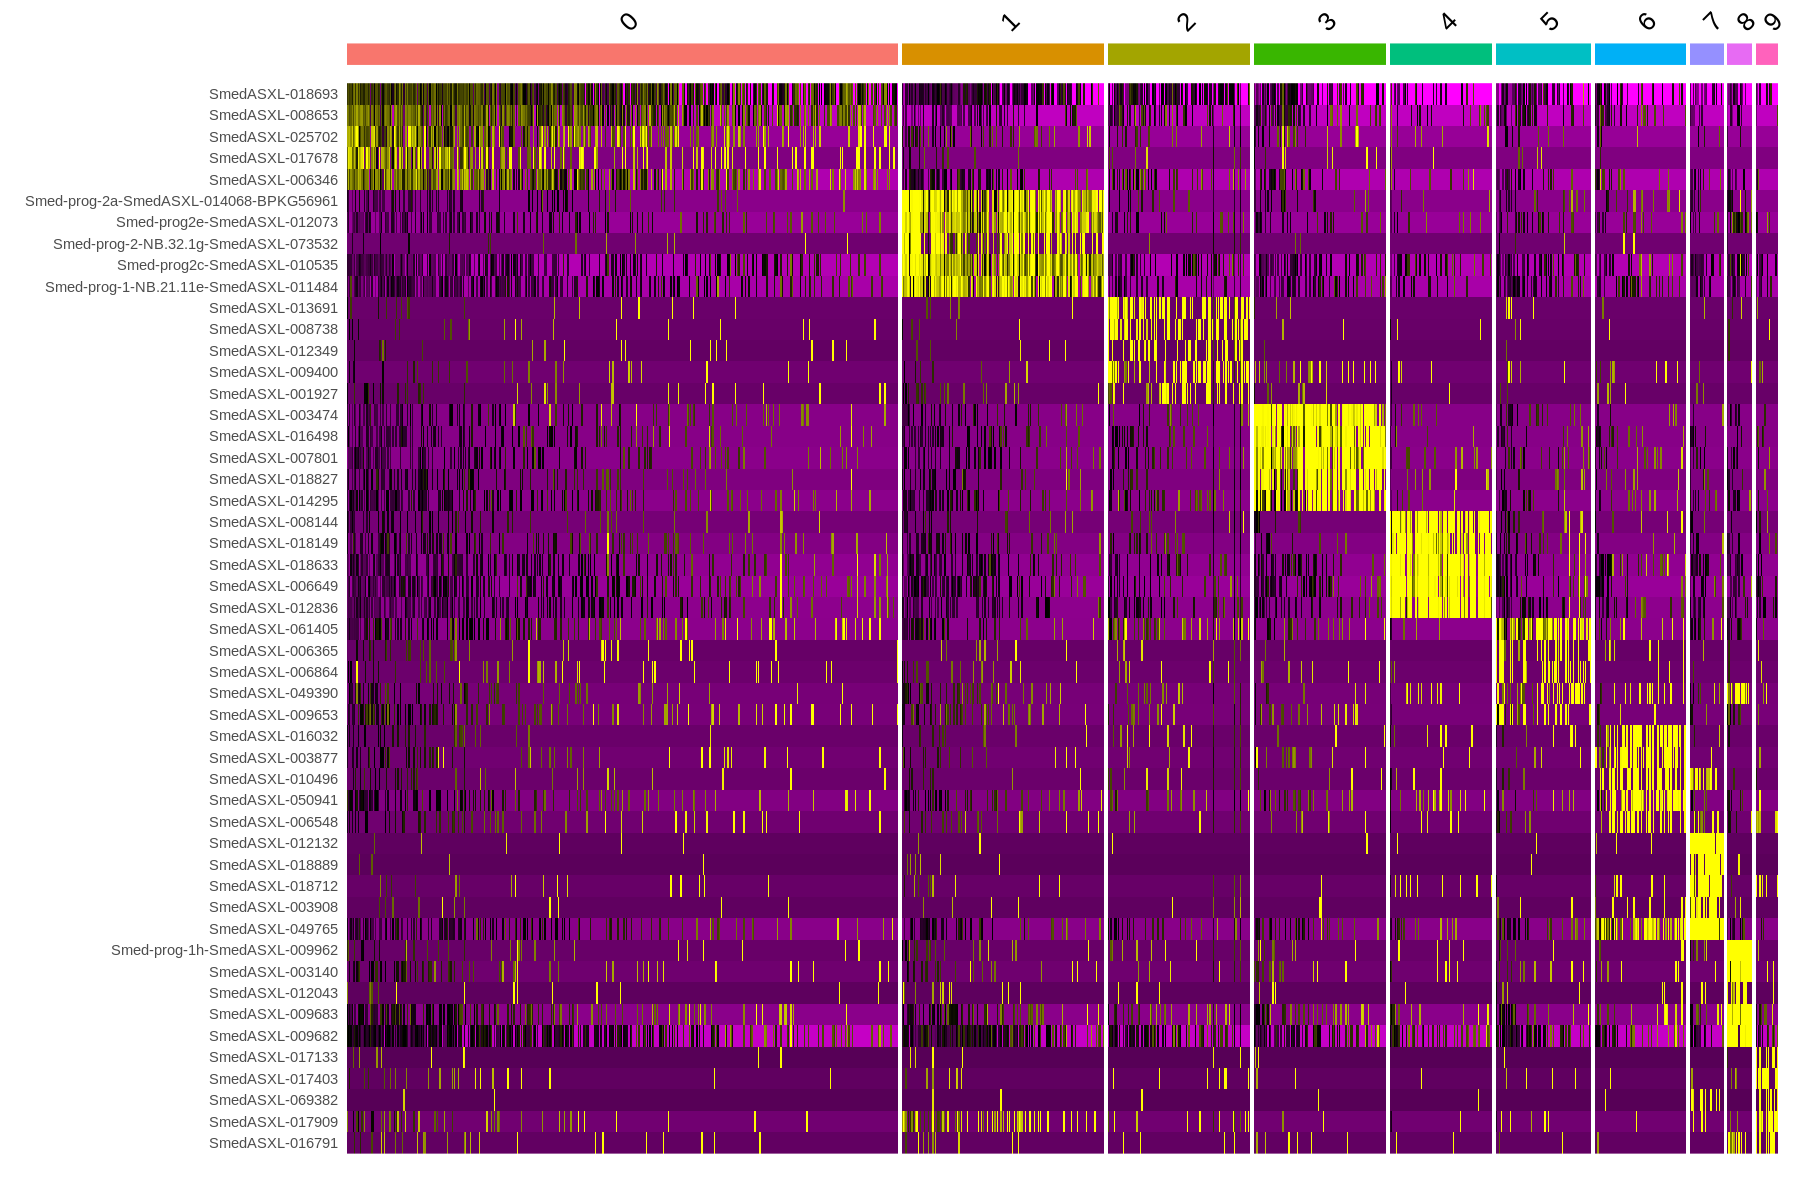

In [41]:
# Command-41

# 各クラスターで avg_log2FC が高い遺伝子トップ5を抽出する

top5_markers <- planarian_markers %>% 
                    group_by(cluster) %>% 
                    top_n(n = 5, avg_log2FC)

options(repr.plot.width=15, repr.plot.height=10)

# ヒートマップを表示
# 横軸は細胞 (上に細胞が割り当てられているクラスターが表示されている)
# 縦軸は遺伝子
# 黄色い要素は発現量が高い
# 黄色く四角くまとまっている部分は、（先ほど見つけた）各クラスターでのみ発現量が高い遺伝子を表している

DoHeatmap(planarian, features = top5_markers$gene) + NoLegend()

## 16. 遺伝子発現量をUMAPの図に重ねる

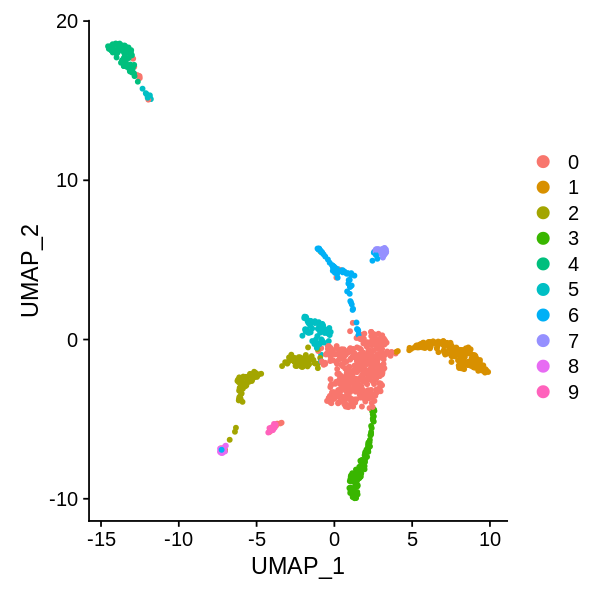

In [42]:
# Command-43

# UMAP の結果を表示
# 点が細胞
# 色がクラスターを表す

options(repr.plot.width=5, repr.plot.height=5)
DimPlot(planarian, reduction = "umap")

In [43]:
# Command-44

# 各クラスターで avg_log2FC  が高いトップ1の遺伝子を抽出

planarian_markers %>% 
    group_by(cluster) %>% 
    top_n(n = 1, avg_log2FC) %>%
    .$gene -> each_cluster_features

print(each_cluster_features)

 [1] "SmedASXL-008653"                      
 [2] "Smed-prog-1-NB.21.11e-SmedASXL-011484"
 [3] "SmedASXL-001927"                      
 [4] "SmedASXL-014295"                      
 [5] "SmedASXL-012836"                      
 [6] "SmedASXL-009653"                      
 [7] "SmedASXL-050941"                      
 [8] "SmedASXL-049765"                      
 [9] "SmedASXL-009682"                      
[10] "SmedASXL-017909"                      


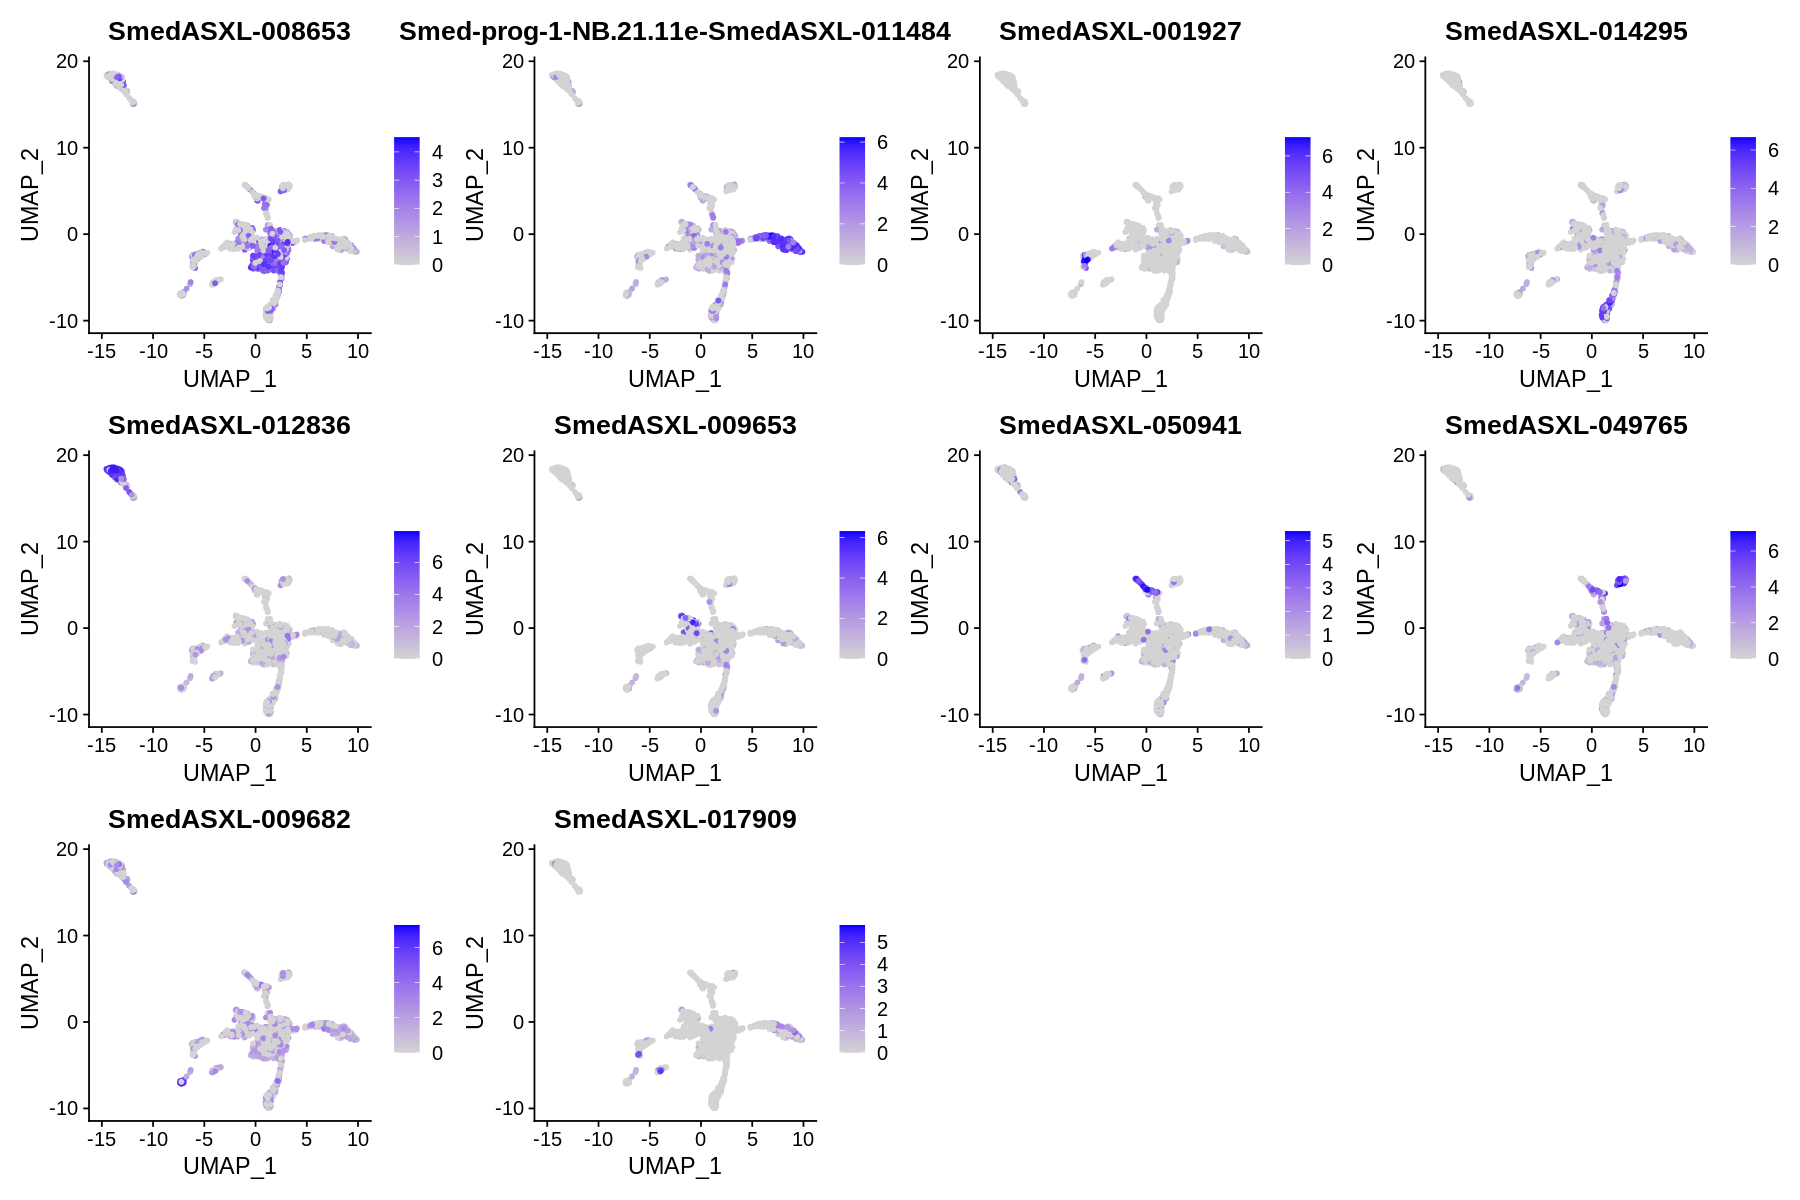

In [44]:
# Command-45

# UMAP の図に、Command-43 で抽出した遺伝子を表示
# 点は細胞、色が高いのは各遺伝子の発現量が高いことを意味する
# Command-43 の図と比較し、各クラスターで発現量が高くなっているかを確かめる

options(repr.plot.width=15, repr.plot.height=10)

FeaturePlot(planarian, features = each_cluster_features)

In [45]:
# Command-46

# マーカーについての情報をR dataset 形式で保存する

saveRDS(planarian_markers, file = "planarian_markers.rds")

# Seurat オブジェクトをR dataset 形式で保存する

saveRDS(planarian, file = "planarian_seurat.rds")